In [0]:
#Appli de réference
#améliorée au fil du temps
#noter la bibli cython=C+Python-> performances égales au C

In [4]:

!pip install pydrive
!git clone https://github.com/thtrieu/darkflow.git 
!pip install Cython
!pip install pytube
!pip install PyDrive


Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 32.98 MiB | 42.26 MiB/s, done.
Resolving deltas: 100% (1760/1760), done.


In [5]:
import os 
os.chdir('/content/darkflow') 
!pwd

/content/darkflow


In [6]:
!pip install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [0]:
import pydrive
import time
from tqdm import tqdm
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!mkdir /content/darkflow/bin

In [0]:
download = drive.CreateFile({'id': '1J-GZ6mvhu12j19zZtq9fTbnyJeCgxE0g'}) # insert the fild ID here
download.GetContentFile('/content/darkflow/bin/yolov2.weights')

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

In [11]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
    'gpu' : 1.0
          }
tfnet = TFNet(options)

Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.025590181350708008s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)


/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 38, 38, 256)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 38, 38, 512)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 256)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 38, 38, 512)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 256)
 Load  |  Yep

In [12]:
from google.colab import files
file = files.upload()

Saving upload.jpg to upload.jpg


In [13]:
import pprint as pp

original_img = cv2.imread("upload.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# sauf erreur l'instruction suivante est le "moteur" de la détection
results = tfnet.return_predict(original_img)
#results est entré ensite commme donnée de boxing qui fabrique l'image détectée
# l'instruction suivante édite le résultat de la détection.Voir le listing suivant

pp.pprint(results)

[{'bottomright': {'x': 157, 'y': 208},
  'confidence': 0.6707979,
  'label': 'person',
  'topleft': {'x': 61, 'y': 3}},
 {'bottomright': {'x': 286, 'y': 258},
  'confidence': 0.32715645,
  'label': 'person',
  'topleft': {'x': 200, 'y': 38}},
 {'bottomright': {'x': 524, 'y': 373},
  'confidence': 0.73317635,
  'label': 'person',
  'topleft': {'x': 443, 'y': 139}},
 {'bottomright': {'x': 594, 'y': 430},
  'confidence': 0.766193,
  'label': 'person',
  'topleft': {'x': 501, 'y': 135}},
 {'bottomright': {'x': 403, 'y': 191},
  'confidence': 0.6003153,
  'label': 'car',
  'topleft': {'x': 330, 'y': 160}},
 {'bottomright': {'x': 467, 'y': 195},
  'confidence': 0.6615529,
  'label': 'car',
  'topleft': {'x': 383, 'y': 153}},
 {'bottomright': {'x': 487, 'y': 183},
  'confidence': 0.4264006,
  'label': 'car',
  'topleft': {'x': 436, 'y': 153}},
 {'bottomright': {'x': 334, 'y': 179},
  'confidence': 0.37700826,
  'label': 'truck',
  'topleft': {'x': 271, 'y': 124}},
 {'bottomright': {'x': 420, 

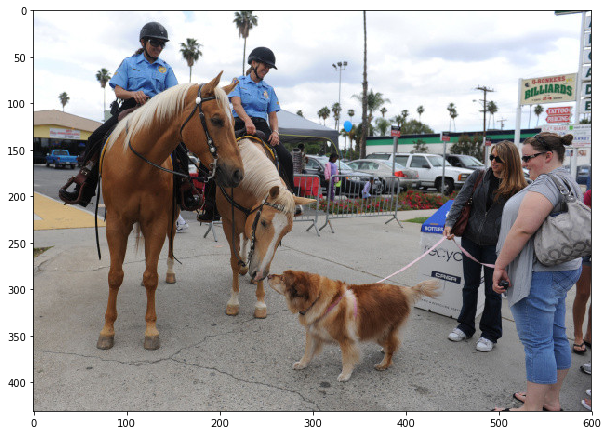

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

In [0]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

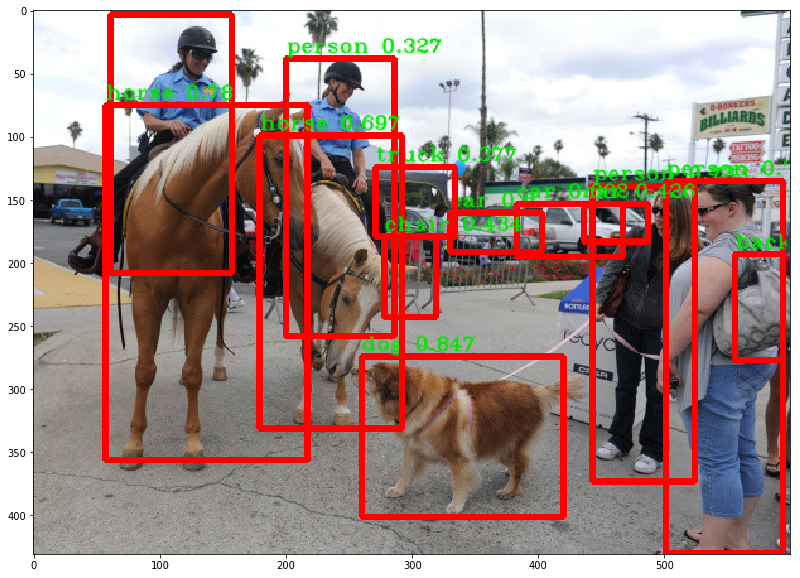

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [21]:
#chargement dde la video
from google.colab import files
file = files.upload()

Saving video.mp4 to video.mp4


In [0]:
cap = cv2.VideoCapture("video.mp4")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
from google.colab.patches import cv2_imshow

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (int(width), int(height)))

while(True):
   # Capture frame-by-frame
   ret, frame = cap.read()
    
   if ret == True:
       frame = np.asarray(frame)
       results = tfnet.return_predict(frame)

       new_frame = boxing(frame, results)

       # Display the resulting frame
       out.write(new_frame)
        
       #cv2.imshow('frame',new_frame)
       #cv2_imshow('frame')
       if cv2.waitKey(1) & 0xFF == ord('q'):
            break
   else:
       break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

# et voilà ,c'est fait...